Objective 2: Medication Combination Effectiveness 



Goal: Investigate the effectiveness of specific combinations of diabetes medications on patient outcomes.


Key Variables: metformin,glipizide, glyburide, insulin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, tolbutamide, readmitted

Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Data Loading

In [2]:
data = pd.read_csv('D:/diabetes+130-us+hospitals+for+years+1999-2008/cleaned_diabetic_data_with_Median.csv')

In [3]:
print(data.head())

   encounter_id             race  gender      age  time_in_hospital  \
0       2278392        Caucasian  Female   (0-10)                 1   
1        149190        Caucasian  Female  (10-20)                 3   
2         64410  AfricanAmerican  Female  (20-30)                 2   
3        500364        Caucasian    Male  (30-40)                 2   
4         16680        Caucasian    Male  (40-50)                 1   

          medical_specialty  num_lab_procedures  num_procedures  \
0  Pediatrics-Endocrinology                  41               0   
1                         ?                  59               0   
2                         ?                  11               5   
3                         ?                  44               1   
4                         ?                  51               0   

   num_medications  number_outpatient  ...  citoglipton  insulin  \
0                1                  0  ...           No       No   
1               18                

Defining Variables

In [4]:
X = data[['metformin', 'glipizide', 'glyburide', 'insulin', 'repaglinide', 
          'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'tolbutamide']]

y = data['readmitted']

Convert categorical variables to numeric using one-hot encoding 

In [ ]:
X = pd.get_dummies(X, drop_first=True)

Split Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Hyperparameter Tuning

In [6]:

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=2)

Getting the Best Parameters

In [7]:
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}


Making Predictions with the Best Model

In [8]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Model Evaluation

Classification report

In [9]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:


c:\Users\mklas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         <30       0.00      0.00      0.00      3425
         >30       0.50      0.00      0.00     10644
          NO       0.54      1.00      0.70     16461

    accuracy                           0.54     30530
   macro avg       0.35      0.33      0.23     30530
weighted avg       0.47      0.54      0.38     30530



c:\Users\mklas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mklas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion matrix

In [10]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[    0     0  3425]
 [    0     1 10643]
 [    0     1 16460]]


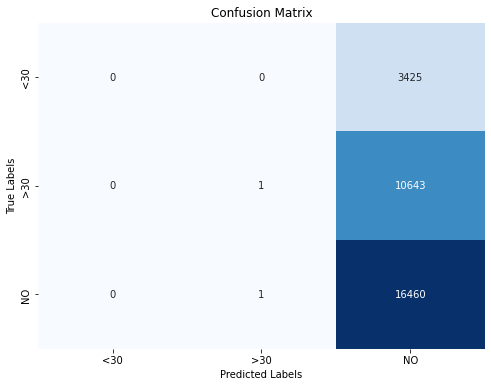

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['<30', '>30', 'NO'], 
            yticklabels=['<30', '>30', 'NO'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after Hyperparameter Tuning: {accuracy:.2f}")

Accuracy after Hyperparameter Tuning: 0.54


ROC Curve and AUC (Area Under the Curve)

c:\Users\mklas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\mklas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\mklas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


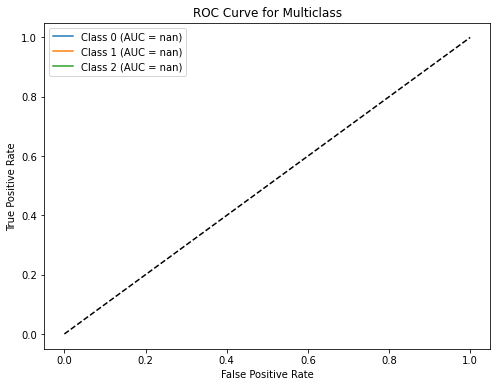

In [20]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_test_bin = label_binarize(y_test, classes=[0, 1, 2]) 
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass')
plt.legend(loc='best')
plt.show()


Precision-Recall Curve

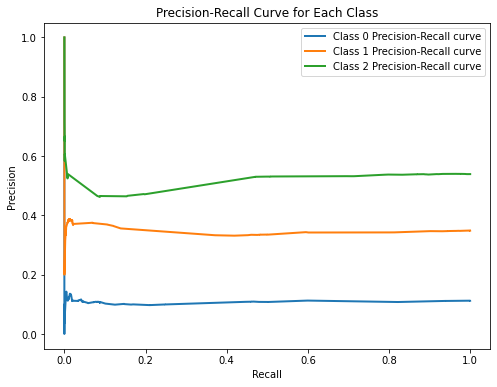

In [16]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_test_bin = label_binarize(y_test, classes=['<30', '>30', 'NO'])
y_proba = best_model.decision_function(X_test)

precision = dict()
recall = dict()
for i in range(len(['<30', '>30', 'NO'])):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_proba[:, i])

plt.figure(figsize=(8, 6))
for i in range(len(['<30', '>30', 'NO'])):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} Precision-Recall curve')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend(loc="best")
plt.show()


F1 Score

In [17]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average=None) 
print(f"F1 Score for each class: {f1}")

f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {f1_weighted:.2f}")


F1 Score for each class: [0.00000000e+00 1.87863986e-04 7.00589500e-01]
Weighted F1 Score: 0.38


Learning Curve

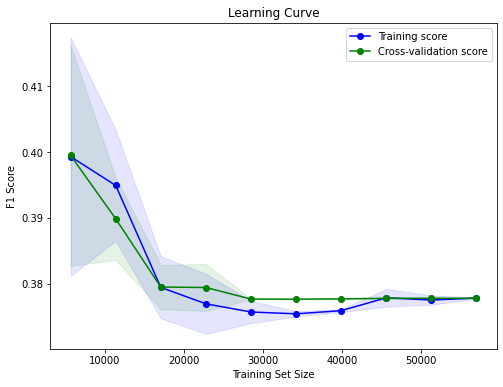

In [18]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1_weighted'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


Cross-Validation Scores

In [19]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='f1_weighted', n_jobs=-1)

print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean CV F1 Score: {np.mean(cv_scores):.2f}")


Cross-Validation F1 Scores: [0.37786792 0.37792093 0.37781065 0.37770034 0.38701395]
Mean CV F1 Score: 0.38
